<a href="https://colab.research.google.com/github/Daniel-F78/SSN/blob/main/Problemas_de_Implementaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problemas a resolver**

**Problema 1**: Demonstración de cálculo usando lenguaje de programación.

Debo hallar los momentos y ejes principales de inercia de  un sólido rígido sabiendo su tensor en un estado previo a la diagonalización, ejercicio proveniente de la asignatura de Ampliación de la Física Clásica.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
I=np.array([[5,-1,0],[-1,5,0],[0,0,3]])
print("Tensor")
print(I)

Tensor
[[ 5 -1  0]
 [-1  5  0]
 [ 0  0  3]]


Matemáticamente hablando, los momentos de inercia de nuestro sólido rígido serán los eigenvalues (vaps) del Tensor (que vamos a tratar como una matriz aunque no sea del todo cierto) y los ejes principales de inercia serán los eigenvectors (veps).

In [5]:
Vaps,Veps=np.linalg.eig(I)
print("Vaps")
print(Vaps)
print("Veps")
print(Veps)

Vaps
[6. 4. 3.]
Veps
[[ 0.70710678  0.70710678  0.        ]
 [-0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]


Así se muestra que los momentos de Inercia que tiene nuestro sólido rígido son:

In [6]:
I1=Vaps[0]
I2=Vaps[1]
I3=Vaps[2]
print("I1=",I1)
print("I2=",I2)
print("I3=",I3)

I1= 6.0
I2= 4.0
I3= 3.0


Y que los ejes principales de inercia son:

In [7]:
v1=Veps[:,0]
v2=Veps[:,1]
v3=Veps[:,2]
print("v1=",v1)
print("v2=",v2)
print("v3=",v3)

v1= [ 0.70710678 -0.70710678  0.        ]
v2= [0.70710678 0.70710678 0.        ]
v3= [0. 0. 1.]


**Problema 2**: Representar las diferentes densidades de estado de los sólidos inorgánicos semiconductores.
Me parece un ejercicio interesante porque puedo aprovechar y superponer las diferentes gráficas para mejor comparación.

In [181]:
m=9.01*10**-31
h=6.626*10**-34
ht=h/(2*np.pi)
d=ht/1.602*10**-19
E3=np.arange(0.1,5,0.1)
E2=np.arange(0.1,5,0.1)
E1=np.arange(0.1,5,0.1)
import sympy as sy
E0=np.linspace(0.1,5,1000)
Ec=0.1

Con las constantes definidas voy a escribir las fórmulas de las densidades de estado que deducimos en las clases de la asignatura.

3D:

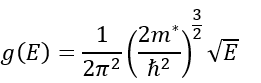

In [182]:
f3=1/(2*np.pi)*(2*m/(d**2))**(3/2)*(E3)**(1/2)
M3=np.max(f3)
g3D=f3/M3

2D:

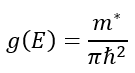

In [183]:
f2=m/(np.pi*d**2)
M2=np.max(f2)
g2D=f2/M2

1D:

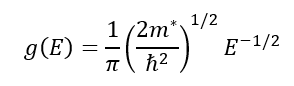

In [184]:
f1=1/np.pi*(2*m/(d**2))**(1/2)*E1**(-1/2)
M1=np.max(f1)
g1D=f1/M1

0D:

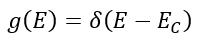

In [185]:
def numerical_dirac_delta(E0,center,epsilon=0.0001):
   return np.exp(-((E0-0.1)**2)/(2*epsilon**2))/(epsilon*np.sqrt(2*np.pi))
f0 = numerical_dirac_delta(E0,Ec)
M0=np.max(f0)
g0D=f0/M0

Ahora vamos a representar las cuatro funciones

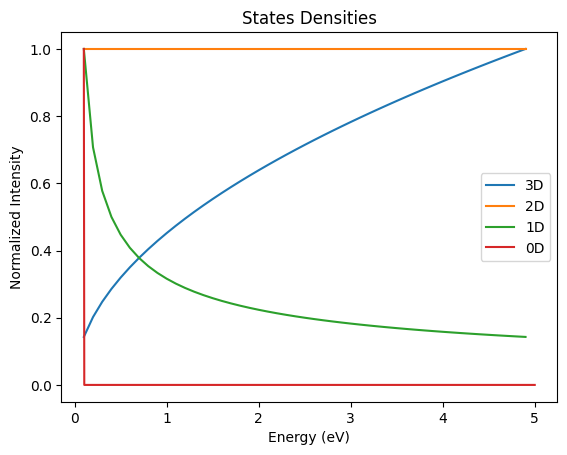

In [187]:
T=plt.plot(E3,g3D)
D=plt.plot(E2, np.full_like(E2, g2D))
U=plt.plot(E1, g1D)
C=plt.plot(E0, g0D)
plt.title('States Densities')
plt.xlabel('Energy (eV)')
plt.ylabel('Normalized Intensity')
plt.legend(['3D','2D','1D','0D'])